# Loan Application Status Prediction

**Problem Statement:**

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status



In [1]:
#Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore,boxcox

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score


from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the dataset

df =pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


There are 614 rows and 13 columns in the dataset.It has both numeric and categorical type features.

In [5]:
#Droping Loan ID column, as its not important for our analysis.
df.drop('Loan_ID', axis=1, inplace= True)

In [6]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

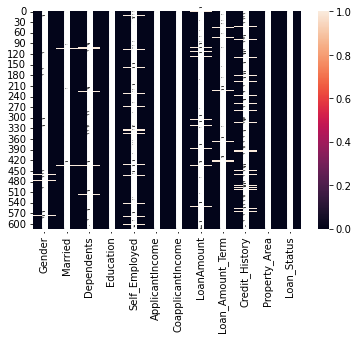

In [7]:
sns.heatmap(df.isnull(),annot=True)

Gender,Married,Dependents,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History having null values in the data.

In [8]:
#Let's handle the null values
#Filling Null Values
df['Dependents'].fillna(value=df['Dependents'].mode()[0],inplace=True)
df['Gender'].fillna(value=df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(value=df['Married'].mode()[0],inplace=True)
df['Self_Employed'].fillna(value=df['Self_Employed'].mode()[0],inplace=True)
df['LoanAmount'] = df['LoanAmount'].fillna(value=df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(value=df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(value=df['Credit_History'].mean())

In [9]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [10]:
# Checking unique value in dataset
df.nunique()

Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           204
Loan_Amount_Term      11
Credit_History         3
Property_Area          3
Loan_Status            2
dtype: int64

# EDA

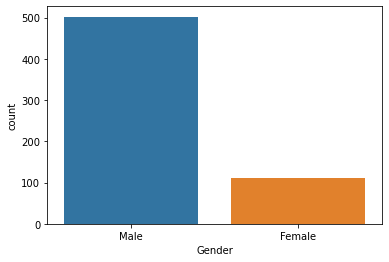

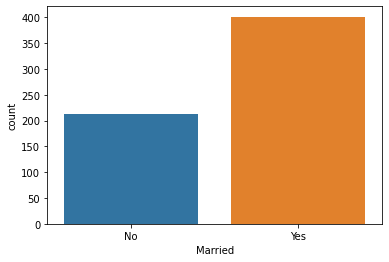

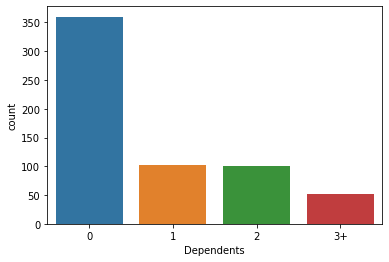

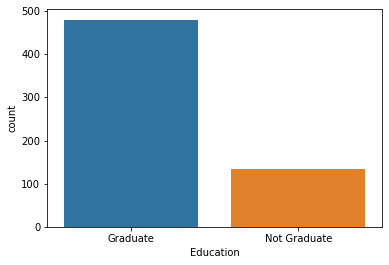

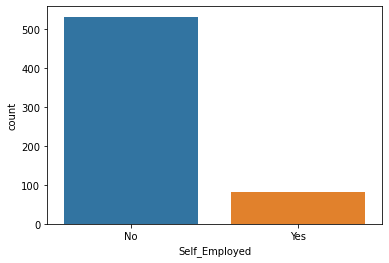

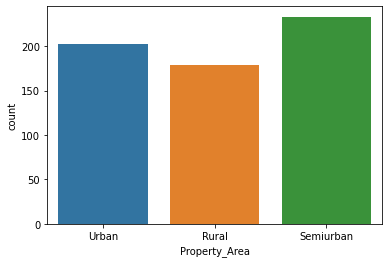

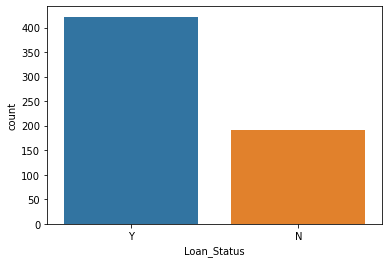

In [11]:
cat_features= df.select_dtypes(include=[np.object])
for col in cat_features:
    sns.countplot(df[col])
    plt.show()

From above plots, we can observe:

* Maximum applicants are Male.
* Mostly married pepole are applying for loans to fullfil their needs.
* Most of the applicatnts are Graduate.
* Only few applicants are self employed.The chance to get loan approval is high for applicant who are working professional or     who are in jobs.
* There are more applicants from Semiurban however the numbers are not very much high.

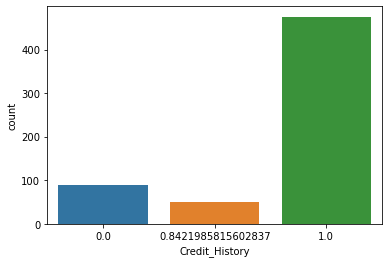

In [12]:
# Visualizing the count of Credit_History of the applicants
sns.countplot(df["Credit_History"])
plt.show()

Most of the applicants having credit history as 1 are high in numbers.

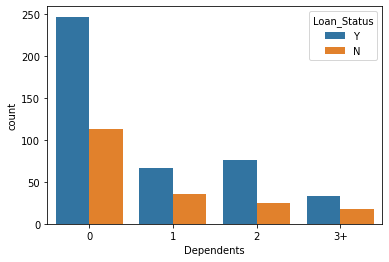

In [13]:
#Visualizing count of Dependents of the applicants on the basis of loan status
sns.countplot(df["Dependents"],hue=df["Loan_Status"])
plt.show()

The count of 0 dependents is high and the applicants who has 0 dependents are more likely to get their loan approved.

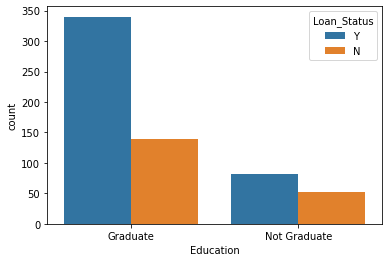

In [14]:
#Visualizing count of Education of the applicants
sns.countplot(df["Education"],hue=df["Loan_Status"])
plt.show()

Most of the applicants who are applying for loan are graduate. Also chances of getting loans approved is high for graduate.

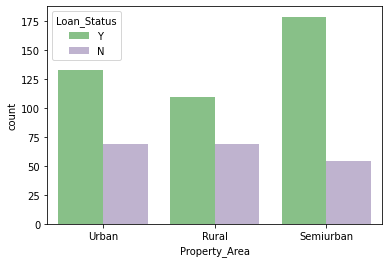

In [15]:
#Visualizing Property_Area of the applicants
sns.countplot(df["Property_Area"],hue=df["Loan_Status"],palette="Accent")
plt.show()

Most of the applicants from the Semiurban area and they have more chance of getting approval.

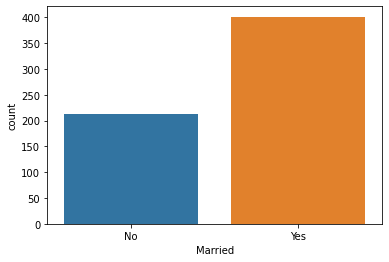

In [16]:
# Visualizing the count of Dependents 
sns.countplot(df["Married"])
plt.show()

Most of the applicants are married.

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

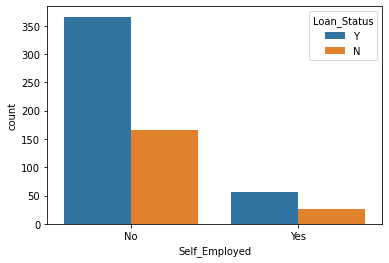

In [17]:
sns.countplot(x='Self_Employed',hue='Loan_Status',data=df)

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

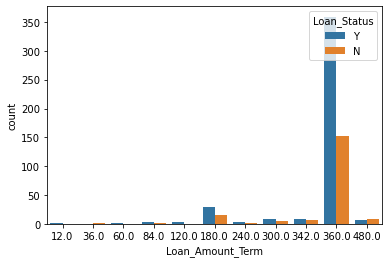

In [18]:
#Comparing Loan_Amount_term and LoanAmount
sns.countplot(x='Loan_Amount_Term',hue='Loan_Status',data=df)

* Most of the people applied loan for 360 months term.More than half of the loans are getting approved,
* Mostly the loans applied for 480 months, are getting approved.

<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

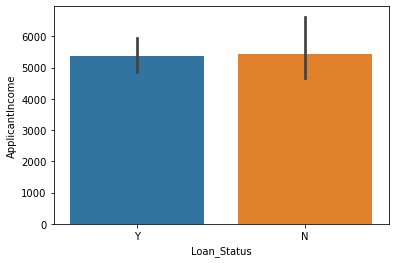

In [19]:
sns.barplot(y='ApplicantIncome',x='Loan_Status',data=df)

Most of the applicants income is under 6000.

<AxesSubplot:xlabel='Loan_Status', ylabel='CoapplicantIncome'>

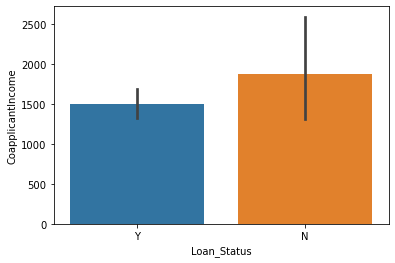

In [20]:
sns.barplot(y='CoapplicantIncome',x='Loan_Status',data=df)

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

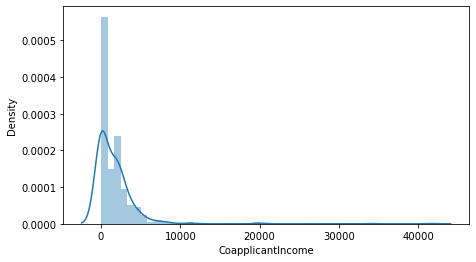

In [21]:
fig=plt.figure(figsize=(16,4))

fig.add_subplot(121)
sns.distplot(df.CoapplicantIncome)

Most of the co-applicants income is under 2000 and Around 45 percent of the Applicants either do not have a Co-appli0cant or the Co-applicant isn't Working.

<AxesSubplot:>

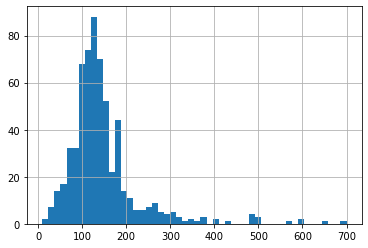

In [22]:
df['LoanAmount'].hist(bins=50)

Most of the applicants apply loan in the range of 100-150.

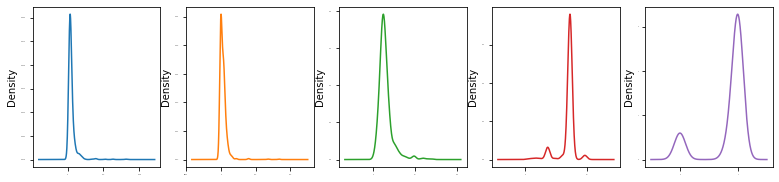

In [23]:
#data distribution of all colomns
pd.DataFrame(df).plot(kind='density',subplots=True, layout=(3,6),sharex=False,legend=False,fontsize=1,figsize=(16,10))
plt.show()

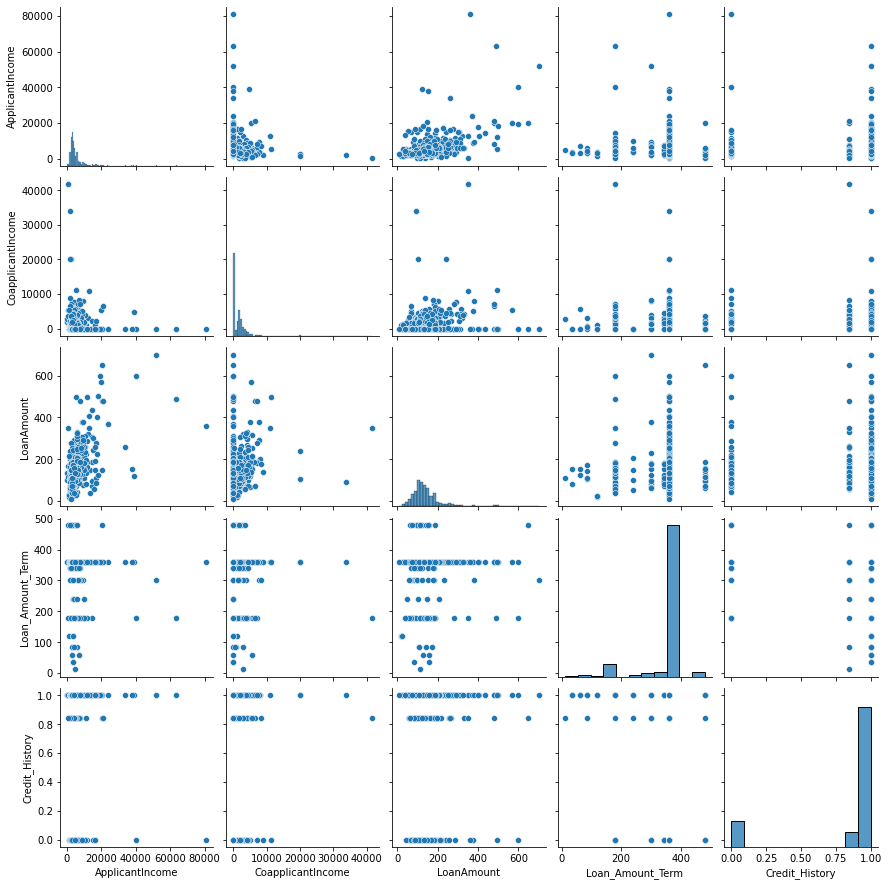

In [24]:
# Checking the pairwise relation in the dataset.
sns.pairplot(df)

# Outliers

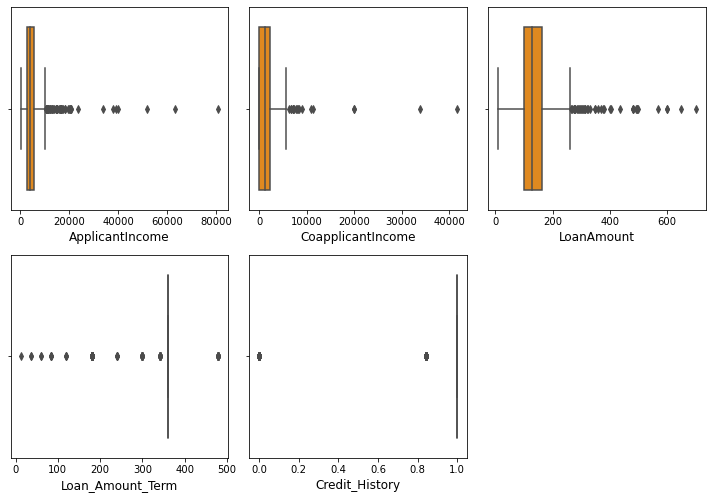

In [25]:
# Identifying the outliers present in numerical columns
#checking for numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
      

plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column],color="darkorange")
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.tight_layout()

We can see outliers in the data.

In [26]:
# removing outliers
features = df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term']]

# Using Zscore method to remove outliers
from scipy.stats import zscore

z=np.abs(zscore(features))
z

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,0.072991,0.554487,0.000000,0.279851
1,0.134412,0.038732,0.219273,0.279851
2,0.393747,0.554487,0.957641,0.279851
3,0.462062,0.251980,0.314547,0.279851
4,0.097728,0.554487,0.064454,0.279851
...,...,...,...,...
609,0.410130,0.554487,0.898095,0.279851
610,0.212557,0.554487,1.267279,2.518655
611,0.437174,0.472404,1.269371,0.279851
612,0.357064,0.554487,0.483367,0.279851


In [27]:
# Creating new dataframe
df_new = df[(z<3).all(axis=1)] 
df_new

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [28]:
# Shape of original dataset
df.shape

(614, 12)

In [29]:
# Shape of new dataframe
df_new.shape

(577, 12)

In [30]:
# Checking the Percentage data loss
data_loss = (df.shape[0]-df_new.shape[0])/df.shape[0]*100
data_loss

6.026058631921824

# Skewness

In [31]:
df_new.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,577.000000,577.000000,577.000000,577.000000,577.000000
mean,4666.020797,1420.807487,136.048644,347.604853,0.838646
std,2965.452652,1651.545352,56.193532,51.819095,0.353795
min,150.000000,0.000000,9.000000,180.000000,0.000000
25%,2833.000000,0.000000,100.000000,360.000000,1.000000
50%,3750.000000,1255.000000,128.000000,360.000000,1.000000
75%,5532.000000,2253.000000,160.000000,360.000000,1.000000
max,20667.000000,8980.000000,380.000000,480.000000,1.000000


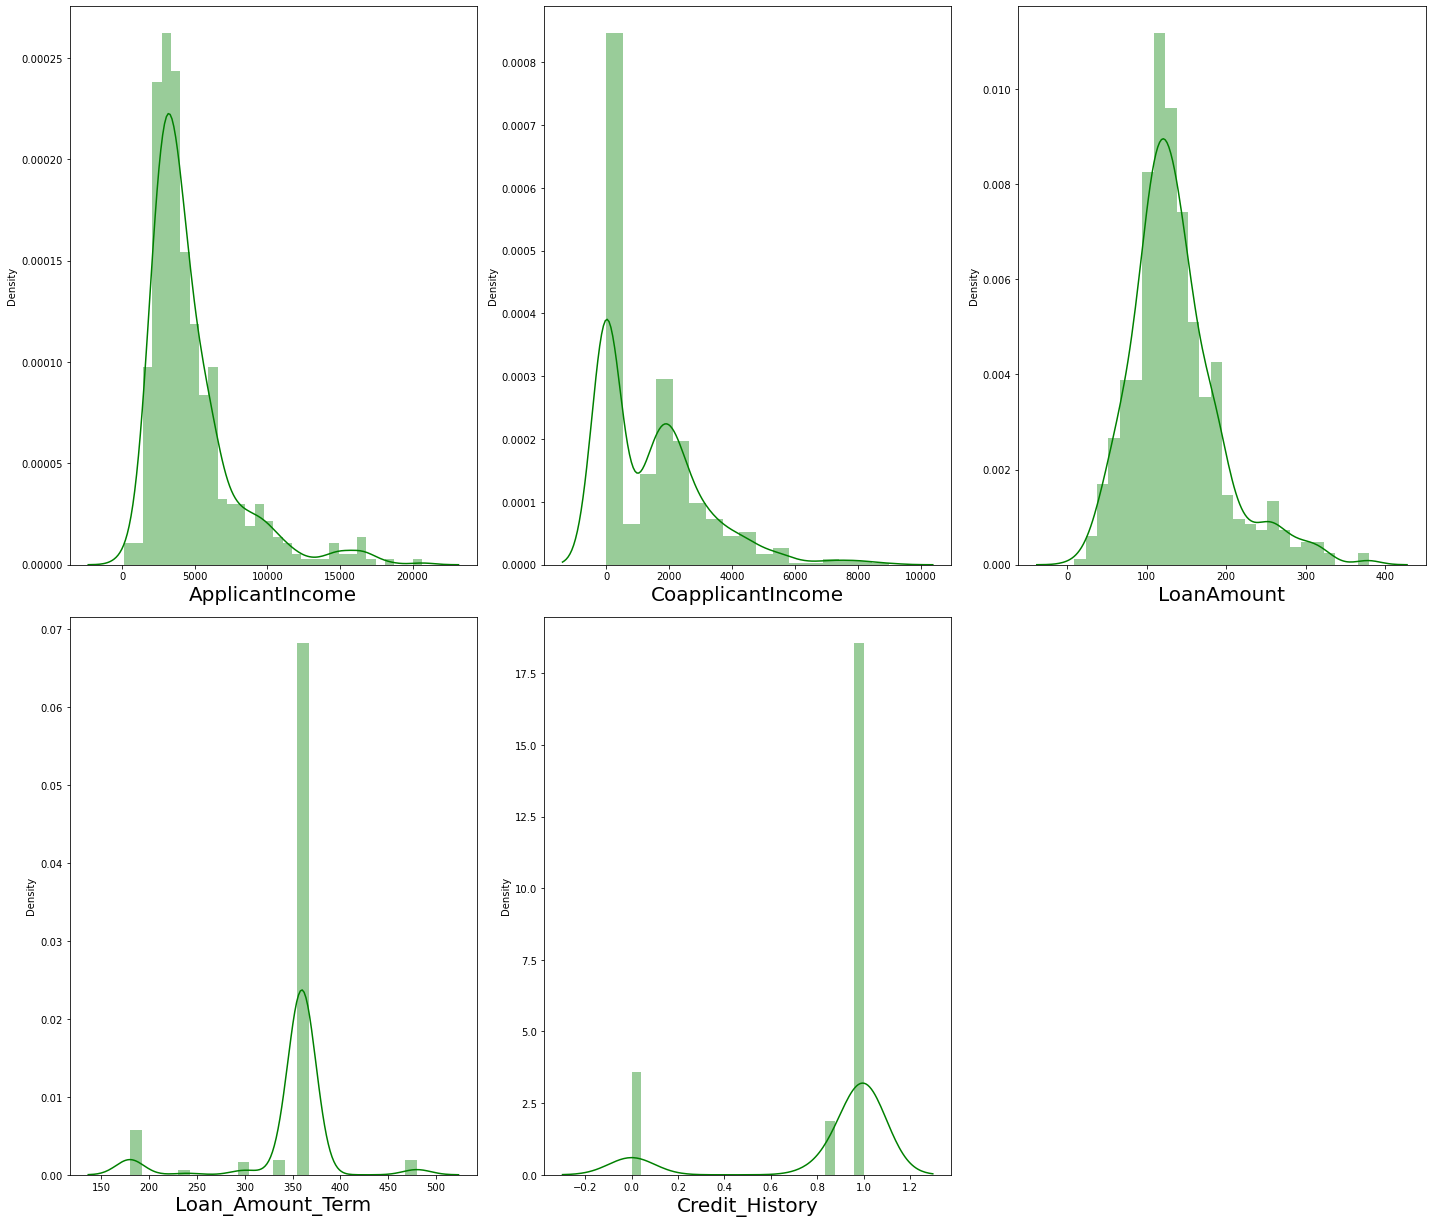

In [32]:
# Checking how the data has been distriubted in each column

plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df_new[column],color="green")
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

We can see skewness is present in the dataset.

In [33]:
# Removing skewness using yeo-johnson  method to get better prediction
skew = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

df_new[skew] = scaler.fit_transform(df_new[skew].values)
df_new[skew].head()

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,0.681780,-1.122446,0.316078
1,0.234783,0.744117,-0.015871
2,-0.527201,-1.122446,-1.443112
3,-0.791972,0.895786,-0.169860
4,0.728848,-1.122446,0.221481


In [34]:
df_new.skew()

ApplicantIncome      0.027981
CoapplicantIncome   -0.191876
LoanAmount           0.047692
Loan_Amount_Term    -2.077031
Credit_History      -1.921860
dtype: float64

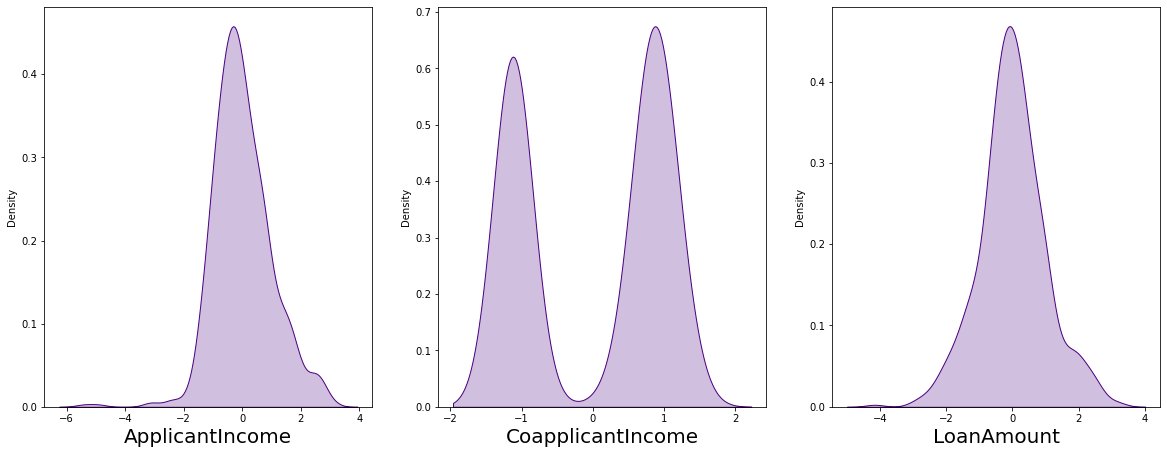

In [35]:
# After removing skewness let's check how the data has been distributed in each column.

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df_new[skew]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df_new[column],color='indigo',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

Skewness is removed.

# Encoding:

In [36]:
categorical_col = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df_new[categorical_col]= df_new[categorical_col].apply(LE.fit_transform)
df_new

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,0.681780,-1.122446,0.316078,360.0,1.0,2,1
1,1,1,1,0,0,0.234783,0.744117,-0.015871,360.0,1.0,0,0
2,1,1,0,0,1,-0.527201,-1.122446,-1.443112,360.0,1.0,2,1
3,1,1,0,1,0,-0.791972,0.895786,-0.169860,360.0,1.0,2,1
4,1,0,0,0,0,0.728848,-1.122446,0.221481,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,-0.587375,-1.122446,-1.301481,360.0,1.0,0,1
610,1,1,3,0,0,0.035386,-1.122446,-2.321865,180.0,1.0,0,1
611,1,1,1,0,0,1.281658,0.173344,1.838099,360.0,1.0,2,1
612,1,1,2,0,0,1.164426,-1.122446,0.961555,360.0,1.0,2,1


# Correlation:

In [37]:
df_new.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.378997,0.188162,0.045696,-0.006207,0.058590,0.234551,0.173082,-0.104412,0.016566,-0.026340,0.017408
Married,0.378997,1.000000,0.329900,0.024817,-0.015779,-0.024783,0.335820,0.182006,-0.127289,0.013364,0.010595,0.089026
Dependents,0.188162,0.329900,1.000000,0.069814,0.044543,0.105994,0.004109,0.131807,-0.083756,-0.017044,0.002327,0.017872
Education,0.045696,0.024817,0.069814,1.000000,-0.007139,-0.176074,0.049739,-0.126509,-0.094628,-0.080920,-0.068596,-0.092658
Self_Employed,-0.006207,-0.015779,0.044543,-0.007139,1.000000,0.212260,-0.087338,0.117550,-0.033346,-0.014899,-0.028253,-0.026525
ApplicantIncome,0.058590,-0.024783,0.105994,-0.176074,0.212260,1.000000,-0.360946,0.434072,-0.068592,0.034734,-0.011364,-0.002484
CoapplicantIncome,0.234551,0.335820,0.004109,0.049739,-0.087338,-0.360946,1.000000,0.196334,-0.000588,0.001596,-0.074476,0.079344
LoanAmount,0.173082,0.182006,0.131807,-0.126509,0.117550,0.434072,0.196334,1.000000,0.048864,-0.006850,-0.094220,-0.028999
Loan_Amount_Term,-0.104412,-0.127289,-0.083756,-0.094628,-0.033346,-0.068592,-0.000588,0.048864,1.000000,0.030430,-0.058990,-0.018144
Credit_History,0.016566,0.013364,-0.017044,-0.080920,-0.014899,0.034734,0.001596,-0.006850,0.030430,1.000000,-0.009747,0.561857


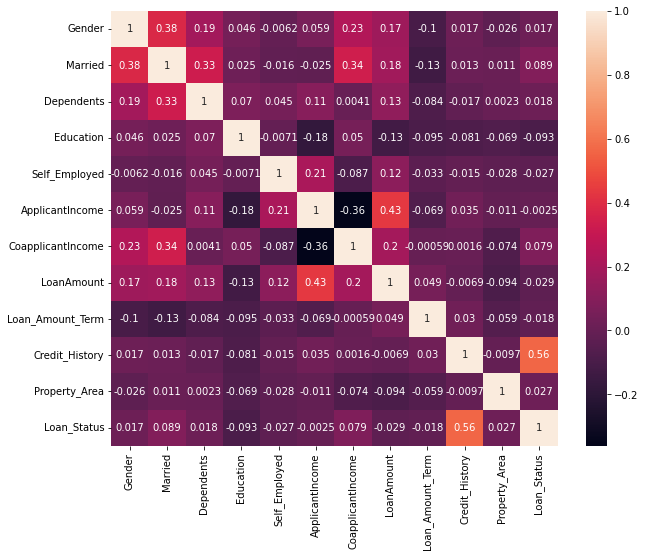

In [38]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(10,8))
sns.heatmap(df_new.corr(),annot=True)
plt.yticks(rotation=0);

* The target column Loan_Status is highly positively correlated with Credit_History and Loan amount.
* Also we can notice there is no multicollinearity issue in the features.
* ApplicantIncome and Education is very less correlated with the target.

# Splitting the data:

In [39]:
x = df_new.drop("Loan_Status", axis=1)
y = df_new["Loan_Status"]

In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.477137,-1.362511,-0.723313,-0.541961,-0.380580,0.681780,-1.122446,0.316078,0.239408,0.456461,1.227472
1,0.477137,0.733939,0.282353,-0.541961,-0.380580,0.234783,0.744117,-0.015871,0.239408,0.456461,-1.306522
2,0.477137,0.733939,-0.723313,-0.541961,2.627567,-0.527201,-1.122446,-1.443112,0.239408,0.456461,1.227472
3,0.477137,0.733939,-0.723313,1.845150,-0.380580,-0.791972,0.895786,-0.169860,0.239408,0.456461,1.227472
4,0.477137,-1.362511,-0.723313,-0.541961,-0.380580,0.728848,-1.122446,0.221481,0.239408,0.456461,1.227472
...,...,...,...,...,...,...,...,...,...,...,...
572,-2.095835,-1.362511,-0.723313,-0.541961,-0.380580,-0.587375,-1.122446,-1.301481,0.239408,0.456461,-1.306522
573,0.477137,0.733939,2.293686,-0.541961,-0.380580,0.035386,-1.122446,-2.321865,-3.237229,0.456461,-1.306522
574,0.477137,0.733939,0.282353,-0.541961,-0.380580,1.281658,0.173344,1.838099,0.239408,0.456461,1.227472
575,0.477137,0.733939,1.288020,-0.541961,-0.380580,1.164426,-1.122446,0.961555,0.239408,0.456461,1.227472


In [41]:
y.value_counts()

1    398
0    179
Name: Loan_Status, dtype: int64

We can notice, imbalance in the data. Let's remove it.

In [45]:
# Oversampling the data
#!pip install imblearn
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x, y = SM.fit_resample(x,y)

In [46]:
y.value_counts()

1    398
0    398
Name: Loan_Status, dtype: int64

The data is balanced now, Since the count of the target is 398 so the data is balanced by oversampling all the classes to the count 398.

# VIF Checking:

In [48]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(x):
    vif=pd.DataFrame()
    vif['variables']=x.columns
    vif['VIF FACTOR']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)
calc_vif(x)

,variables,VIF FACTOR
0,Gender,1.248474
1,Married,1.502910
2,Dependents,1.190708
3,Education,1.087913
4,Self_Employed,1.042821
5,ApplicantIncome,1.852958
6,CoapplicantIncome,1.686818
7,LoanAmount,1.676780
8,Loan_Amount_Term,1.072374
9,Credit_History,1.020300


As VIF for all features is less than 10, we can proceed with the model.

# Finding Best Random State:

In [49]:
from sklearn.linear_model import LogisticRegression
maxAccu=0
maxRs=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    predlr=lr.predict(x_test)
    acc=accuracy_score(y_test,predlr)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print("Best Accuracy is ", maxAccu,"on Random_State",maxRs)

Best Accuracy is  0.8 on Random_State 68


In [50]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=68)

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

lg=LogisticRegression()
sv=SVC()
rf=RandomForestClassifier()
knn=KNeighborsClassifier()
dtc=DecisionTreeClassifier()

model=[lg,sv,rf,knn,dtc]

for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print('Accuracy score: of',m)
    acc=accuracy_score(y_test,pred)
    print(acc)
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    score=cross_val_score(m,x,y,cv=5)
    crossval=score.mean()
    print("Cross Validation Score:",crossval)
    print("Difference Between Accuracy Score and CrossValidation Score:",abs(acc-crossval))
    print("\n")
    

Accuracy score: of LogisticRegression()
0.8
[[44 21]
 [11 84]]
              precision    recall  f1-score   support

           0       0.80      0.68      0.73        65
           1       0.80      0.88      0.84        95

    accuracy                           0.80       160
   macro avg       0.80      0.78      0.79       160
weighted avg       0.80      0.80      0.80       160

Cross Validation Score: 0.7072955974842767
Difference Between Accuracy Score and CrossValidation Score: 0.09270440251572332


Accuracy score: of SVC()
0.80625
[[50 15]
 [16 79]]
              precision    recall  f1-score   support

           0       0.76      0.77      0.76        65
           1       0.84      0.83      0.84        95

    accuracy                           0.81       160
   macro avg       0.80      0.80      0.80       160
weighted avg       0.81      0.81      0.81       160

Cross Validation Score: 0.7575707547169811
Difference Between Accuracy Score and CrossValidation Score: 0

We can see Random Forest Classifier is performing better than other models.

# Hyper Parameter Tuning

In [52]:
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()

parameters = {'max_depth': np.arange(8,20), 
              'max_features': ['sqrt','auto', 'log2'], 
              'n_estimators': [92,95,97,98,100,102,105,107,109],
              'criterion' :['gini','entropy','log_loss'] }

grid_rf = GridSearchCV(rf, param_grid = parameters, cv = 5)
grid_rf.fit(x,y)

best_params = grid_rf.best_params_
best_score = grid_rf.best_score_

print(best_params)
print(best_score)

{'criterion': 'entropy', 'max_depth': 17, 'max_features': 'sqrt', 'n_estimators': 97}
0.8593946540880504


In [53]:
rf1=RandomForestClassifier(max_features ='sqrt', max_depth= 17,criterion= 'entropy',n_estimators=97)
rf1.fit(x_train,y_train)
predrf1=rf1.predict(x_test)
print('Accuracy score: of',rf1)
acc=accuracy_score(y_test,predrf1)
print(acc)
print(confusion_matrix(y_test,predrf1))
print(classification_report(y_test,predrf1))

Accuracy score: of RandomForestClassifier(criterion='entropy', max_depth=17, n_estimators=97)
0.9
[[56  9]
 [ 7 88]]
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        65
           1       0.91      0.93      0.92        95

    accuracy                           0.90       160
   macro avg       0.90      0.89      0.90       160
weighted avg       0.90      0.90      0.90       160



# ROC AUC

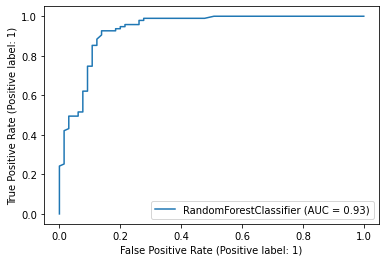

In [54]:
from sklearn import datasets 
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve 

disp = plot_roc_curve(rf1,x_test,y_test)
#plot_roc_curve(rf1, x_test, y_test, ax=disp.ax_)     # ax_=Axes with confusion matrix

plt.show()

The score is good, we can save the model.

# Saving The Model

In [55]:
# Saving the model using .pkl
import pickle
filename='Loan_App.pkl'
pickle.dump(rf1,open(filename,'wb'))

# Conclusion

In [57]:
import numpy as np
a=np.array(y_test)
df_com=pd.DataFrame({"original":a,"Predicted":predrf1},index=range(len(a)))
df_com.sample(5)

,original,Predicted
17,1,1
110,1,1
84,1,1
66,0,0
38,0,0
